<a href="https://colab.research.google.com/github/Recollectionss/University/blob/main/4-course/1-sem/eemp/lab-1/eemp_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

General solution:
         180.0⋅C₁  
P(t) = ────────────
             0.72⋅t
       C₁ - ℯ      

Solution for P0=250:
    -642.857142857143     
──────────────────────────
 0.72⋅t                   
ℯ       - 3.57142857142857

Solution for P0=120:
    360.0    
─────────────
 0.72⋅t      
ℯ       + 2.0

Population at t=1 month:
  P0 = 250: P(1) ≈ 423.77
  P0 = 120: P(1) ≈ 88.79


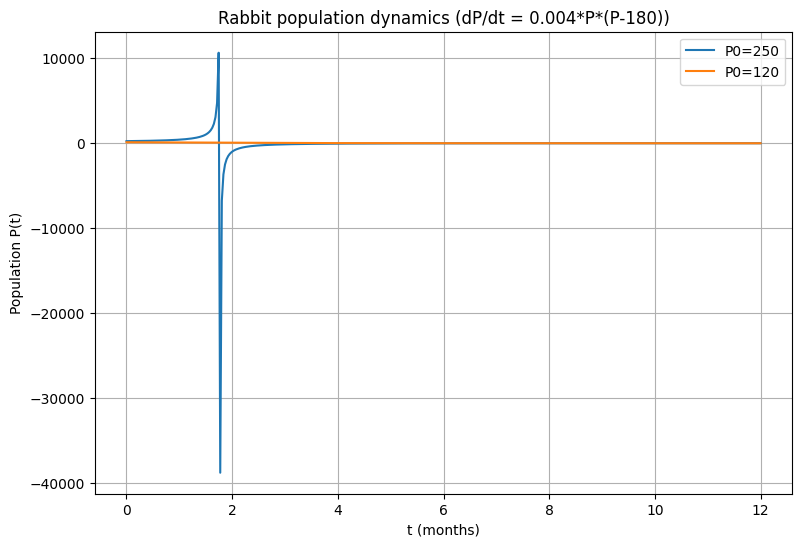

In [ ]:
# Task 1:
# Варіант 2. Припустимо, що кількість кролів...
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import log, isfinite

# Parameters
r = 0.004
K = 180
P0_cases = [250, 120]  # two initial populations
t_eval = 1.0  # time at which we want P(t)

# Symbolic variables
t = sp.symbols('t', real=True)
P = sp.Function('P')

# Differential equation
de = sp.Eq(sp.diff(P(t), t), r * P(t) * (P(t) - K))

# Solve symbolically for general solution
sol_general = sp.dsolve(de)
print("General solution:")
sp.pprint(sol_general)

# Solve for initial conditions
solutions = {}
for P0 in P0_cases:
    sol = sp.dsolve(de, ics={P(0): P0})
    Pt = sp.simplify(sol.rhs)
    solutions[P0] = Pt
    print(f"\nSolution for P0={P0}:")
    sp.pprint(Pt)

# Evaluate at t=1
print("\nPopulation at t=1 month:")
for P0, expr in solutions.items():
    val_t1 = float(expr.subs(t, t_eval))
    print(f"  P0 = {P0}: P(1) ≈ {val_t1:.2f}")

# Plot population dynamics
t_vals = np.linspace(0, 12, 400)
plt.figure(figsize=(9,6))
for P0, expr in solutions.items():
    f_numeric = sp.lambdify(t, expr, 'numpy')
    y = f_numeric(t_vals)
    plt.plot(t_vals, y, label=f"P0={P0}")
plt.xlabel("t (months)")
plt.ylabel("Population P(t)")
plt.title("Rabbit population dynamics (dP/dt = 0.004*P*(P-180))")
plt.grid(True)
plt.legend()
plt.show()


Equilibrium points: [(0, 0), (3.0, 0), (0.5, 1.6666666666666667)]


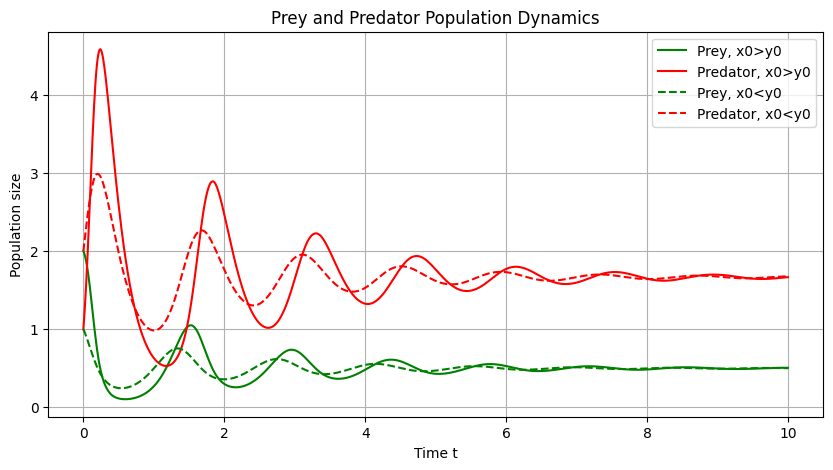

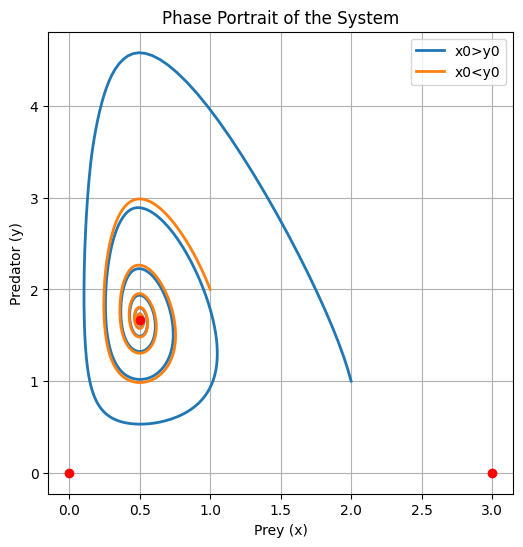

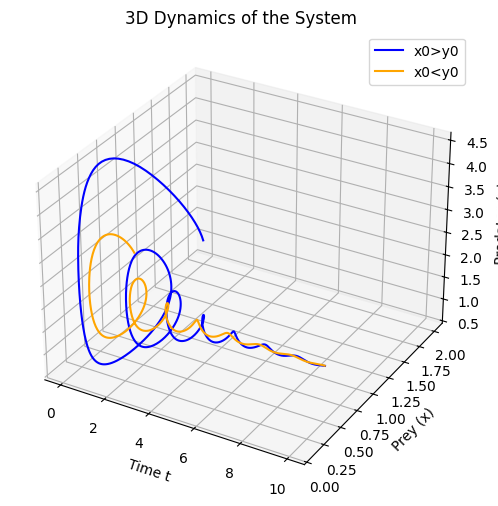

In [ ]:
#Task 2:
#Варіант 6. Нехай x(t) – чисельність жертв...
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

alpha, beta, gamma, delta, epsilon = 6, 2, 3, 4, 8

def predator_prey(t, state):
    prey, predator = state
    dprey_dt = alpha * prey - beta * prey**2 - gamma * prey * predator
    dpredator_dt = -delta * predator + epsilon * prey * predator
    return [dprey_dt, dpredator_dt]

# Equilibrium points
fixed_points = [(0, 0), (alpha/beta, 0), (delta/epsilon, (alpha - beta*(delta/epsilon))/gamma)]
print("Equilibrium points:", fixed_points)

# Time interval and evaluation points
time_range = (0, 10)
time_points = np.linspace(time_range[0], time_range[1], 1000)

# Solutions for different initial conditions
solution_a = solve_ivp(predator_prey, time_range, [2, 1], t_eval=time_points)
solution_b = solve_ivp(predator_prey, time_range, [1, 2], t_eval=time_points)

plt.figure(figsize=(10, 5))
plt.plot(solution_a.t, solution_a.y[0], label="Prey, x0>y0", color="green")
plt.plot(solution_a.t, solution_a.y[1], label="Predator, x0>y0", color="red")
plt.plot(solution_b.t, solution_b.y[0], "--", label="Prey, x0<y0", color="green")
plt.plot(solution_b.t, solution_b.y[1], "--", label="Predator, x0<y0", color="red")
plt.xlabel("Time t")
plt.ylabel("Population size")
plt.title("Prey and Predator Population Dynamics")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(solution_a.y[0], solution_a.y[1], label="x0>y0", linewidth=2)
plt.plot(solution_b.y[0], solution_b.y[1], label="x0<y0", linewidth=2)
for point in fixed_points:
    plt.plot(point[0], point[1], "ro")
plt.xlabel("Prey (x)")
plt.ylabel("Predator (y)")
plt.title("Phase Portrait of the System")
plt.legend()
plt.grid(True)
plt.show()

# 3D dynamics plot
fig3d = plt.figure(figsize=(10, 6))
ax3d = fig3d.add_subplot(111, projection="3d")
ax3d.plot(solution_a.t, solution_a.y[0], solution_a.y[1], label="x0>y0", color="blue")
ax3d.plot(solution_b.t, solution_b.y[0], solution_b.y[1], label="x0<y0", color="orange")
ax3d.set_xlabel("Time t")
ax3d.set_ylabel("Prey (x)")
ax3d.set_zlabel("Predator (y)")
ax3d.set_title("3D Dynamics of the System")
ax3d.legend()
plt.show()


In [ ]:
#Task 3:
#Варіант 6. Для початкової умови задачі знайти:

import numpy as np

# Fecundity values for each age group
birth_rates = [0, 1.1, 1.2, 0.3]

surv_transition = 0.77
surv_last = 0.72

num_groups = len(birth_rates)
leslie_matrix = np.zeros((num_groups, num_groups))

leslie_matrix[0, :] = birth_rates

for age in range(1, num_groups):
    leslie_matrix[age, age-1] = surv_transition

# Last age group survival
leslie_matrix[num_groups-1, num_groups-1] = surv_last

print("Leslie matrix L:")
print(leslie_matrix)

eigenvalues, eigenvectors = np.linalg.eig(leslie_matrix)

# Find dominant eigenvalue
dominant_idx = np.argmax(np.real(eigenvalues))
lambda_dom = np.real(eigenvalues[dominant_idx])

# Stable age distribution
stable_dist = np.real(eigenvectors[:, dominant_idx])
stable_dist = stable_dist / np.sum(stable_dist)

# Harvest fraction
if lambda_dom > 1:
    H = 1 - 1 / lambda_dom
else:
    H = 0.0

print(f"\nDominant eigenvalue (growth rate) λ ≈ {lambda_dom:.6f}\n")

print("Stable age distribution (sum = 1):")
for i, val in enumerate(stable_dist, start=1):
    print(f"  age group {i}: {val:.6f} ({val*100:.2f} %)")

print(f"\nProportion that can be harvested each year (H) ≈ {H:.6f} ({H*100:.2f} %)")


Leslie matrix L:
[[0.   1.1  1.2  0.3 ]
 [0.77 0.   0.   0.  ]
 [0.   0.77 0.   0.  ]
 [0.   0.   0.77 0.72]]

Dominant eigenvalue (growth rate) λ ≈ 1.267251

Stable age distribution (sum = 1):
  age group 1: 0.400596 (40.06 %)
  age group 2: 0.243408 (24.34 %)
  age group 3: 0.147898 (14.79 %)
  age group 4: 0.208098 (20.81 %)

Proportion that can be harvested each year (H) ≈ 0.210890 (21.09 %)
